Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores parámetros: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


<ipython-input-2-58facd84fab6>:47: RuntimeWarning: invalid value encountered in divide
  f1_scores = (2 * precisions * recalls) / (precisions + recalls)


Mejor umbral basado en Precision-Recall: 0.9414541770399141

Resultados de Random Forest (con umbral 0.3):
Accuracy: 0.39977572189515
F1-score: 0.47580184444625806
ROC-AUC: 0.5961729233568626
Matriz de Confusión:
[[1363 6203]
 [ 220 2915]]

Resultados de Random Forest (con umbral 0.2):
Accuracy: 0.34576207831043826
F1-score: 0.46869545420050085
ROC-AUC: 0.5961729233568626
Matriz de Confusión:
[[ 612 6954]
 [  47 3088]]

Resultados de Random Forest (con umbral 0.1):
Accuracy: 0.3121203625829362
F1-score: 0.4596638038611172
ROC-AUC: 0.5961729233568626
Matriz de Confusión:
[[ 209 7357]
 [   4 3131]]


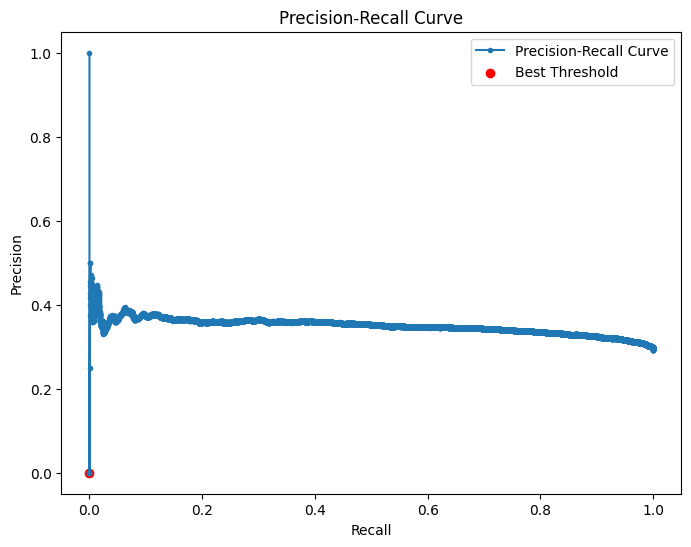

In [ ]:
# CÓDIGO PARA RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_excel("BBDD AGG.xlsx")

# Definir variables predictoras y objetivo
drop_cols = ['id', 'cost_claims_year', 'n_claims_year']  # Evitamos data leakage
X = data.drop(columns=drop_cols + ['has_claim'])
y = data['has_claim']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar ADASYN para balancear clases
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Definir el modelo de Random Forest con ajuste de pesos
rf = RandomForestClassifier(random_state=42, class_weight={0: 1, 1: 3})
param_grid = {
    'n_estimators': [300],  # Optimizamos previamente este valor
    'max_depth': [15, 20, 25],  # Probamos valores más controlados en lugar de None
    'min_samples_split': [5],  # Valor óptimo encontrado antes
    'min_samples_leaf': [2],  # Valor óptimo encontrado antes
    'criterion': ['gini']  # Seleccionamos el mejor criterio encontrado
}

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Mejor modelo obtenido
best_rf = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

# Predicciones de probabilidades
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Encontrar el mejor umbral basado en la curva precision-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = (2 * precisions * recalls) / (precisions + recalls)
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral basado en Precision-Recall: {best_threshold}")

# Función para evaluar el modelo con diferentes umbrales
def evaluate_with_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = (y_pred_proba >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    cm = confusion_matrix(y_true, y_pred)
    return acc, f1, roc_auc, cm

# Evaluar con diferentes umbrales más bajos
thresholds_test = [0.3, 0.2, 0.1]  # Umbrales más bajos para ver su efecto en el F1-score

for threshold in thresholds_test:
    acc, f1, roc_auc, cm = evaluate_with_threshold(y_test, y_pred_proba, threshold)
    print(f"\nResultados de Random Forest (con umbral {threshold}):")
    print(f"Accuracy: {acc}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("Matriz de Confusión:")
    print(cm)

# Graficar Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall Curve')
plt.scatter(recalls[np.argmax(f1_scores)], precisions[np.argmax(f1_scores)], marker='o', color='red', label='Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 30158, number of negative: 30261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 60419, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Resultados de XGBoost (con umbral 0.24579770863056183):
Accuracy: 0.43154845341556863
F1-score: 0.4769111703499871
ROC-AUC: 0.6007849478549425
Matriz de Confusión:
[[1845

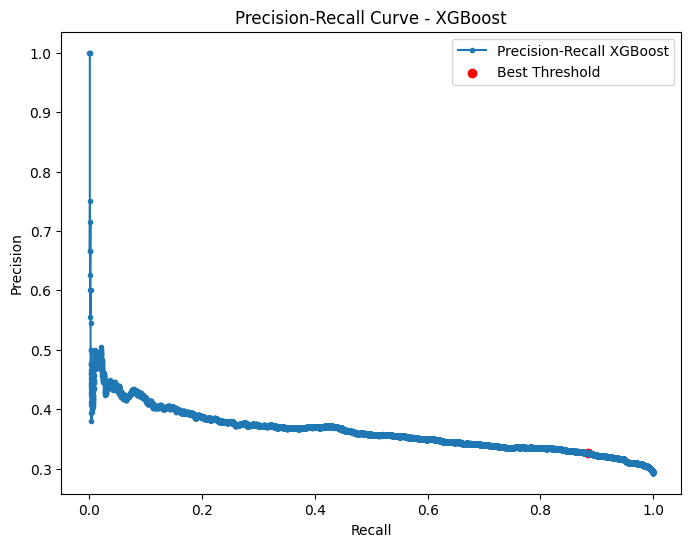


Resultados de LightGBM (con umbral 0.2755859207336475):
Accuracy: 0.4548173067937576
F1-score: 0.4804986642920748
ROC-AUC: 0.6132046707738514
Matriz de Confusión:
[[2169 5397]
 [ 437 2698]]


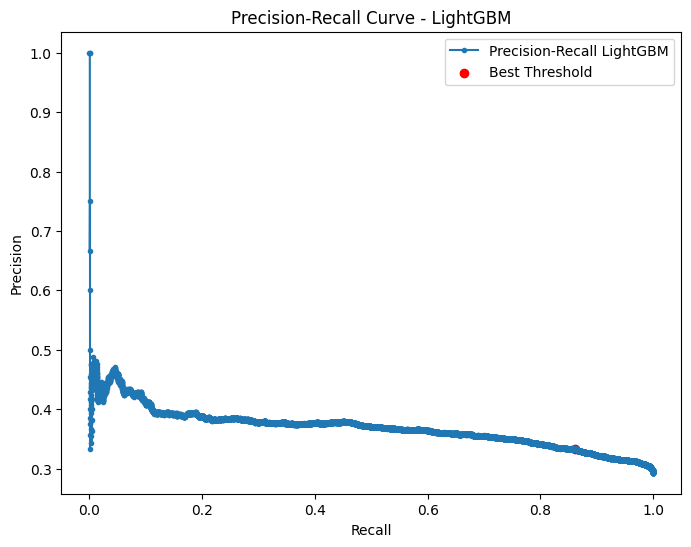

In [ ]:
# CÓDIGO PARA XGBOOST Y LIGHTGBM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import ADASYN
import xgboost as xgb
import lightgbm as lgb

# Cargar los datos
data = pd.read_excel("BBDD AGG.xlsx")

# Definir variables predictoras y objetivo
drop_cols = ['id', 'cost_claims_year', 'n_claims_year']  # Evitamos data leakage
X = data.drop(columns=drop_cols + ['has_claim'])
y = data['has_claim']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar ADASYN para balancear clases
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Definir parámetros de búsqueda
xgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}
lgb_params = {
    'max_depth': [5, 10],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 300],
    'num_leaves': [20, 40]
}

# XGBoost
dfxgb = xgb.XGBClassifier(random_state=42, scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1])
gs_xgb = GridSearchCV(dfxgb, xgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
gs_xgb.fit(X_train_adasyn, y_train_adasyn)
best_xgb = gs_xgb.best_estimator_

# LightGBM
dflgb = lgb.LGBMClassifier(random_state=42, class_weight='balanced')
gs_lgb = GridSearchCV(dflgb, lgb_params, cv=3, scoring='f1', n_jobs=-1, verbose=2)
gs_lgb.fit(X_train_adasyn, y_train_adasyn)
best_lgb = gs_lgb.best_estimator_

# Evaluación
def evaluate_model(model, X_test, y_test, name):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
    f1_scores = (2 * precisions * recalls) / (precisions + recalls)
    best_threshold = thresholds[np.argmax(f1_scores)]
    y_pred = (y_pred_proba >= best_threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nResultados de {name} (con umbral {best_threshold}):")
    print(f"Accuracy: {acc}")
    print(f"F1-score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, marker='.', label=f'Precision-Recall {name}')
    plt.scatter(recalls[np.argmax(f1_scores)], precisions[np.argmax(f1_scores)], marker='o', color='red', label='Best Threshold')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {name}')
    plt.legend()
    plt.show()

# Evaluar XGBoost y LightGBM
evaluate_model(best_xgb, X_test, y_test, "XGBoost")
evaluate_model(best_lgb, X_test, y_test, "LightGBM")


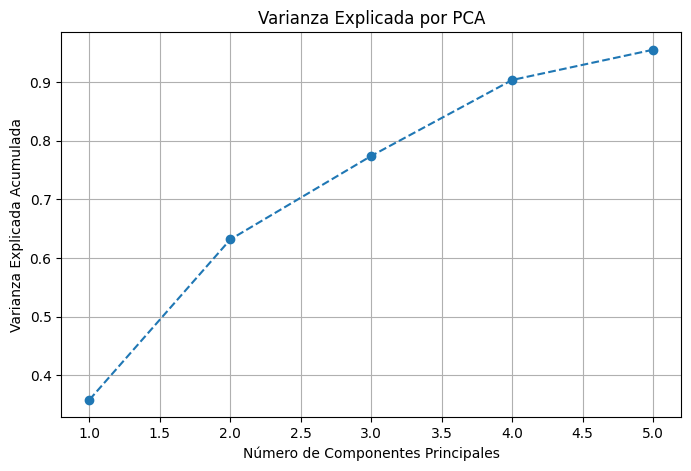

Número de componentes seleccionados: 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 30261, number of negative: 30261
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 60522, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ROC-AUC: 0.9934


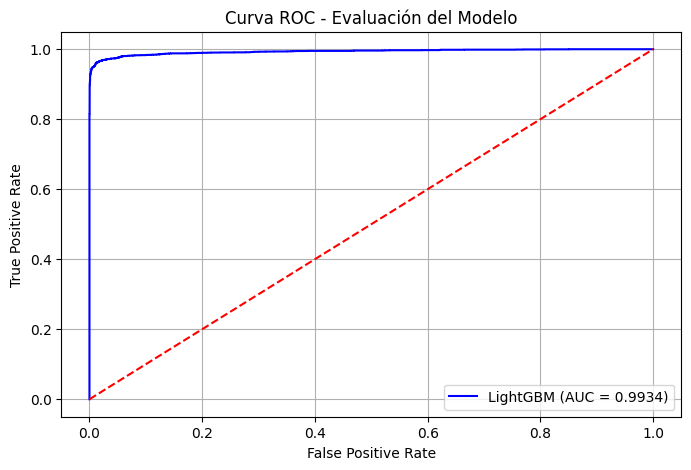

<ipython-input-8-8c2f09094452>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=[f'PC{i+1}' for i in range(X_pca.shape[1])], palette="viridis")


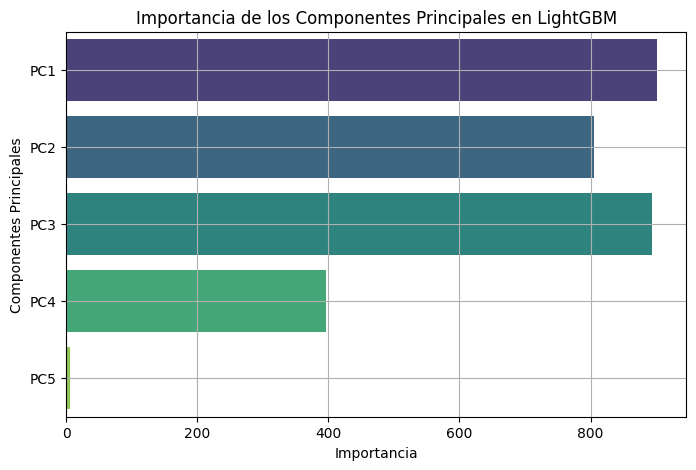

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.9651
F1-Score: 0.9368
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7566
           1       1.00      0.88      0.94      3135

    accuracy                           0.97     10701
   macro avg       0.98      0.94      0.96     10701
weighted avg       0.97      0.97      0.96     10701



In [ ]:
#CÓDIGO LIGHTGBM CON PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE  # Importar SMOTE

# 1. Cargar la base de datos
file_path = "BBDD AGG.xlsx"
df = pd.read_excel(file_path)

# 2. Seleccionar variables predictoras y objetivo
features = ['age', 'years_driving', 'cost_claims_year', 'power', 'value_vehicle', 'years_car', 'weight']
target = 'has_claim'

X = df[features]
y = df[target]

# 3. Estandarizar las variables antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA y seleccionar el número óptimo de componentes
pca = PCA(n_components=0.95)  # Retiene el 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# 5. Visualizar la varianza explicada por cada componente
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada por PCA")
plt.grid()
plt.show()

# Mostrar cuántos componentes se seleccionaron
print(f"Número de componentes seleccionados: {X_pca.shape[1]}")

# 6. División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# 7. Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 8. Crear modelo LightGBM
model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    n_estimators=100
)

# 9. Entrenar el modelo con el conjunto de datos balanceado
model.fit(
    X_train_smote, y_train_smote,
    eval_set=[(X_test, y_test)],
    eval_metric="auc"
)

# 10. Evaluar el modelo
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:.4f}")

# 11. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {roc_auc:.4f})', color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Evaluación del Modelo")
plt.legend()
plt.grid()
plt.show()

# 12. Importancia de los Componentes Principales en el modelo LightGBM
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=[f'PC{i+1}' for i in range(X_pca.shape[1])], palette="viridis")
plt.xlabel("Importancia")
plt.ylabel("Componentes Principales")
plt.title("Importancia de los Componentes Principales en LightGBM")
plt.grid()
plt.show()

# 13. Métricas de evaluación
y_pred_class = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.4f}")

# F1-Score
f1 = f1_score(y_test, y_pred_class)
print(f"F1-Score: {f1:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))


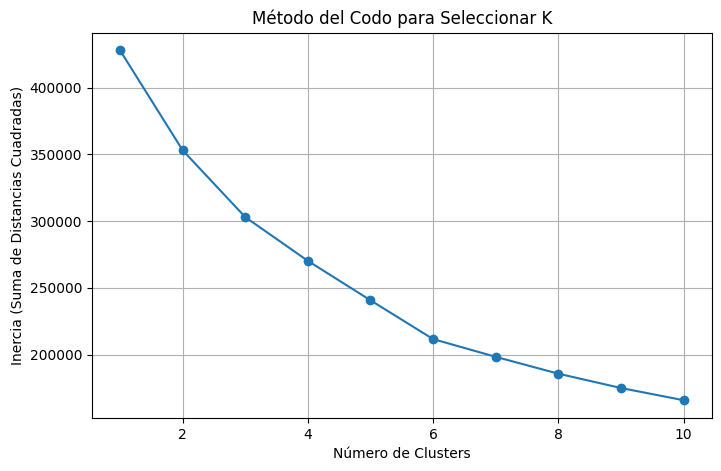

In [ ]:
#CÓDIGO PARA ELBOW METHOD
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cargar el archivo directamente desde la misma carpeta
file_path = "BBDD AGG.xlsx"  # Asegúrate de que el archivo esté en la misma carpeta que el script
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Selección de variables para clustering
variables_clustering = [
    "age", "years_driving", "n_claims_year", "cost_claims_year",
    "power", "value_vehicle", "years_car", "weight"
]

# Normalización de los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_clustering])

# Evaluación del número óptimo de clusters con Elbow Method
inertia = []
K_range = range(1, 11)  # Probamos de 1 a 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="-")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia (Suma de Distancias Cuadradas)")
plt.title("Método del Codo para Seleccionar K")
plt.grid()
plt.show()


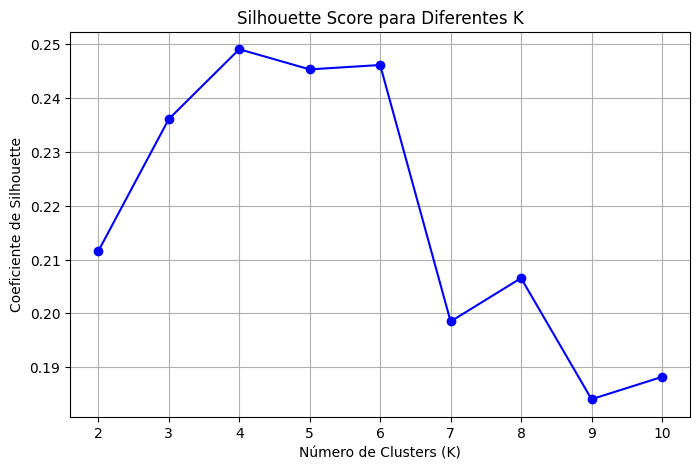

El mejor número de clusters según el coeficiente de Silhouette es: 4


In [ ]:
# CÓDIGO PARA SILHOUETTE SCORE
from sklearn.metrics import silhouette_score

# Probar diferentes valores de K
silhouette_scores = []
K_range = range(2, 11)  # Desde 2 hasta 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(score)

# Graficar el coeficiente de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Coeficiente de Silhouette")
plt.title("Silhouette Score para Diferentes K")
plt.grid()
plt.show()

# Mejor número de clusters según el coeficiente más alto
best_k = K_range[np.argmax(silhouette_scores)]
print(f"El mejor número de clusters según el coeficiente de Silhouette es: {best_k}")


Silhouette Score (K-Means): 0.2394
Silhouette Score (Agglomerative Clustering): 0.1805
Silhouette Score (Gaussian Mixture Model - GMM): -0.0122


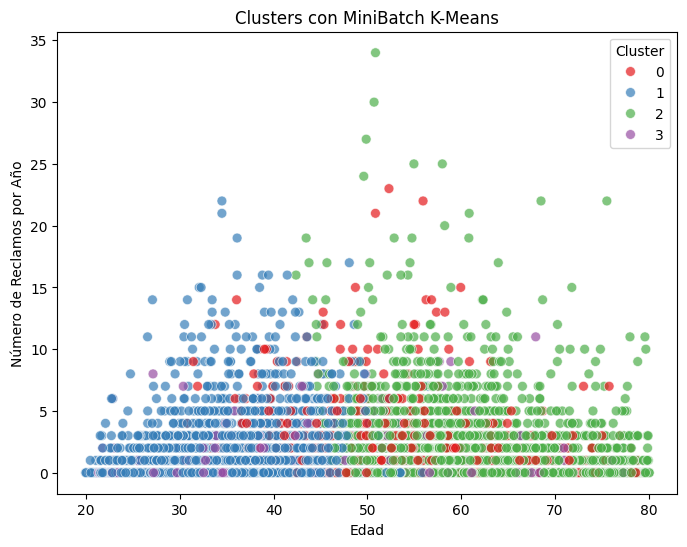

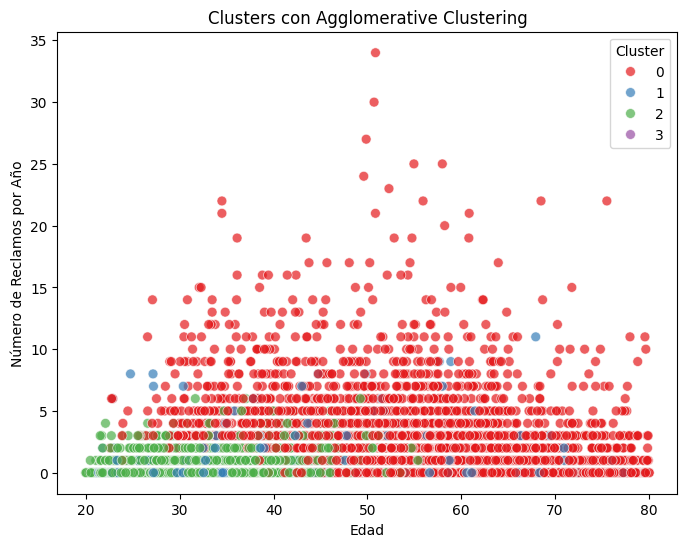

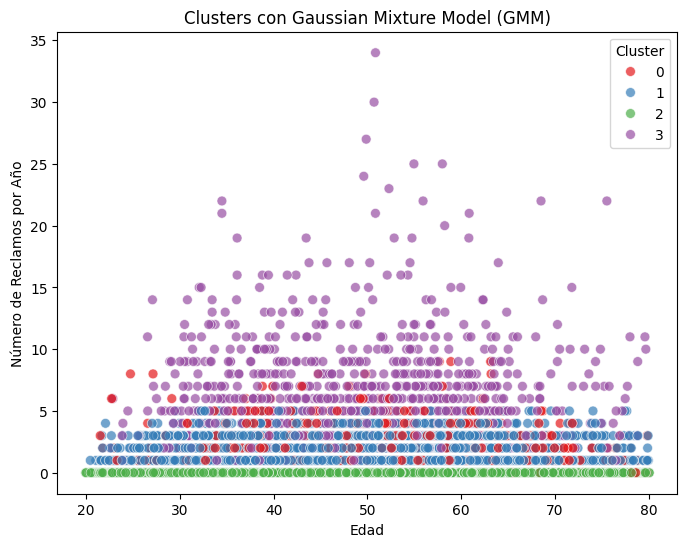

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Cargar la base de datos en un formato optimizado
df = pd.read_excel("BBDD AGG.xlsx", engine="openpyxl")

# Convertir a tipos de datos más eficientes
df = df.astype(np.float32)  # Reduce consumo de memoria

# Seleccionar variables y muestrear si es necesario
variables_clustering = ["age", "years_driving", "n_claims_year", "cost_claims_year",
                        "power", "value_vehicle", "years_car", "weight"]
df_sample = df.sample(frac=0.3, random_state=42)  # Usa solo el 30% de los datos

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[variables_clustering])

# Aplicar MiniBatch K-Means en lugar de K-Means tradicional
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=1000, random_state=42)
df_sample["Cluster_KMeans"] = kmeans.fit_predict(X_scaled)

# Aplicar Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
df_sample["Cluster_Agglo"] = agglo.fit_predict(X_scaled)

# Aplicar Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42)
df_sample["Cluster_GMM"] = gmm.fit_predict(X_scaled)

# Evaluar los Silhouette Scores
silhouette_kmeans = silhouette_score(X_scaled, df_sample["Cluster_KMeans"])
silhouette_agglo = silhouette_score(X_scaled, df_sample["Cluster_Agglo"])
silhouette_gmm = silhouette_score(X_scaled, df_sample["Cluster_GMM"])

print(f"Silhouette Score (K-Means): {silhouette_kmeans:.4f}")
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_agglo:.4f}")
print(f"Silhouette Score (Gaussian Mixture Model - GMM): {silhouette_gmm:.4f}")

# Visualizar los resultados

def plot_clusters(df, cluster_col, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df["age"], y=df["n_claims_year"], hue=df[cluster_col], palette="Set1", s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Edad")
    plt.ylabel("Número de Reclamos por Año")
    plt.legend(title="Cluster")
    plt.show()

# Graficar clusters para cada método
plot_clusters(df_sample, "Cluster_KMeans", "Clusters con MiniBatch K-Means")
plot_clusters(df_sample, "Cluster_Agglo", "Clusters con Agglomerative Clustering")
plot_clusters(df_sample, "Cluster_GMM", "Clusters con Gaussian Mixture Model (GMM)")


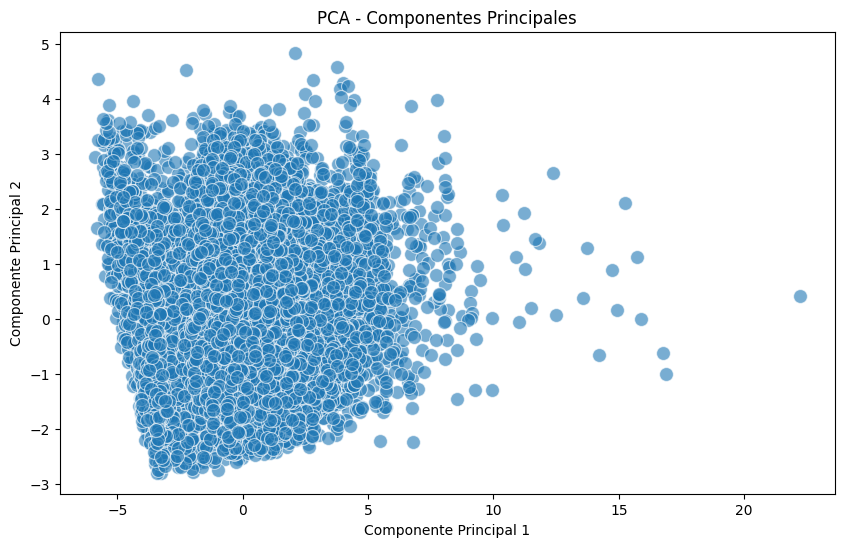

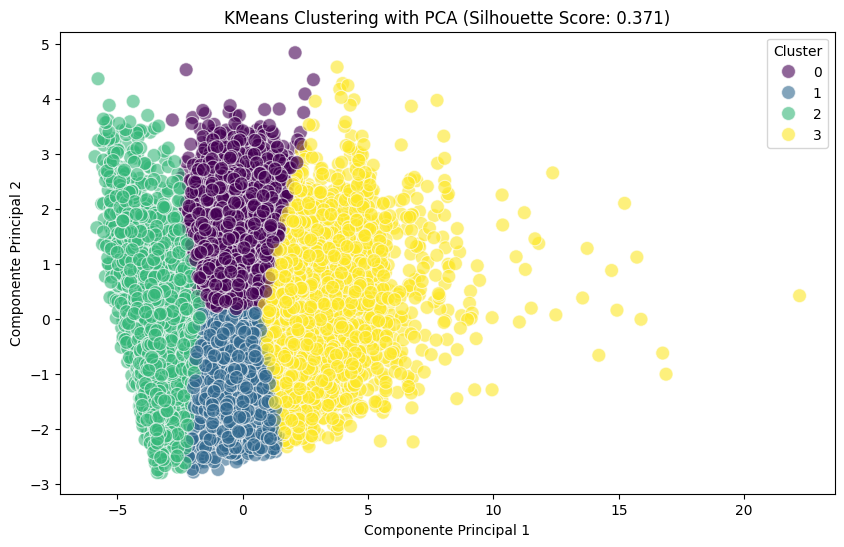

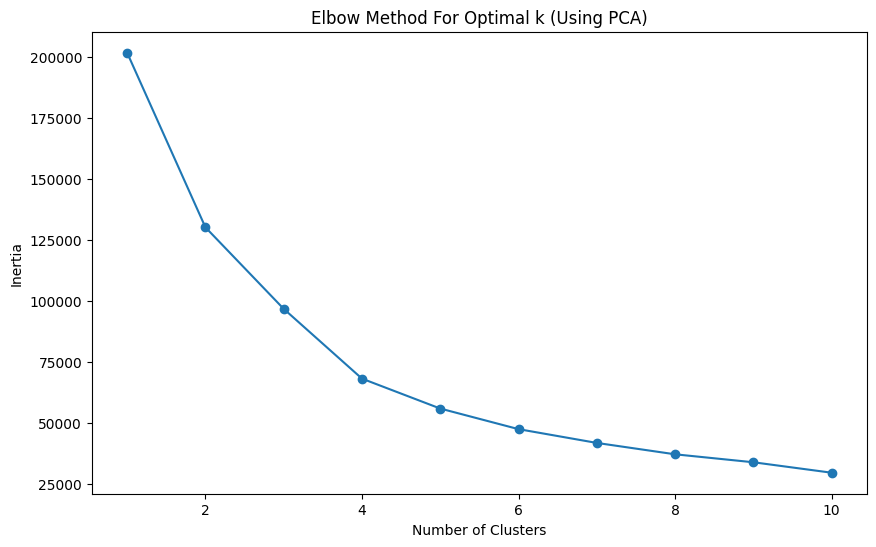

Silhouette Score: 0.371


In [ ]:
# CÓDIGO PARA CLUSTER CON PCA = 2
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Cargar el archivo Excel
BBDD_AGG = pd.read_excel('BBDD AGG.xlsx')

# Seleccionar las variables para el clustering
variables = ['weight', 'years_driving', 'years_car', 'value_vehicle', 'premium', 'power', 'second_driver']

# Filtrar las columnas necesarias
X = BBDD_AGG[variables]

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Graficar los resultados de PCA (para visualizar las dos primeras componentes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], s=100, alpha=0.6)
plt.title('PCA - Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Aplicar KMeans clustering en los datos reducidos por PCA
kmeans = KMeans(n_clusters=4, random_state=42)  # Puedes cambiar el número de clusters si lo necesitas
kmeans.fit(X_pca)

# Añadir las etiquetas de los clusters al DataFrame original
BBDD_AGG['cluster'] = kmeans.labels_

# Calcular el silhouette score
sil_score = silhouette_score(X_pca, kmeans.labels_)

# Graficar los resultados del clustering (usando las componentes principales)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=BBDD_AGG['cluster'], palette='viridis', s=100, alpha=0.6)
plt.title(f"KMeans Clustering with PCA (Silhouette Score: {sil_score:.3f})")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k (Using PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Imprimir el silhouette score
print(f"Silhouette Score: {sil_score:.3f}")


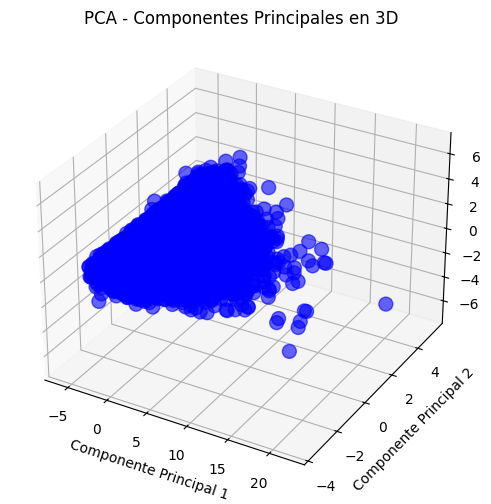

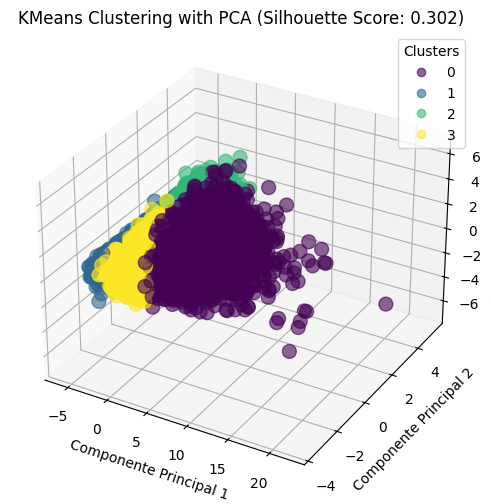

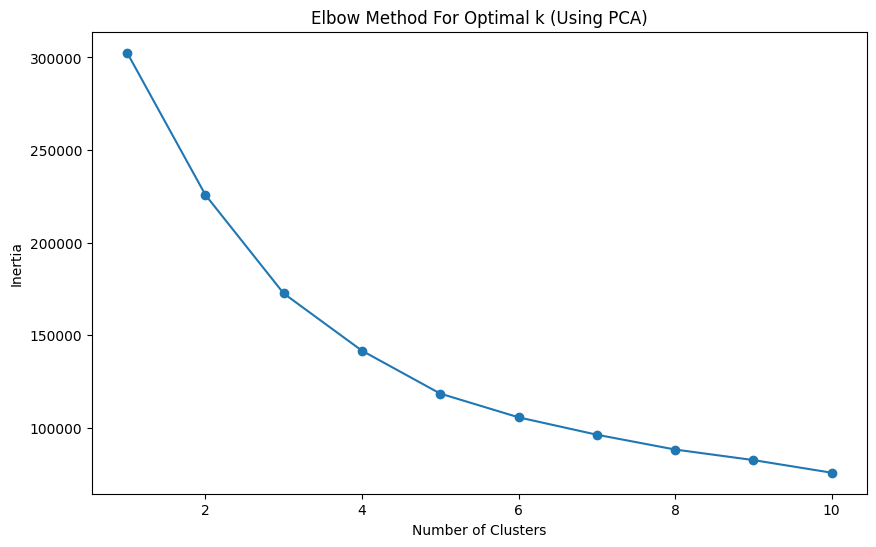

Silhouette Score: 0.302


In [ ]:
# CÓDIGO PARA CLUSTER CON PCA = 3
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Cargar el archivo Excel
BBDD_AGG = pd.read_excel('BBDD AGG.xlsx')

# Seleccionar las variables para el clustering
variables = ['weight', 'age', 'years_driving', 'years_car', 'value_vehicle', 'premium', 'power', 'second_driver']

# Filtrar las columnas necesarias
X = BBDD_AGG[variables]

# Normalizar los datos usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 3 componentes principales
pca = PCA(n_components=3)  # Reducir a 3 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Graficar los resultados de PCA en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con las 3 componentes principales
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=100, alpha=0.6, c='blue')

ax.set_title('PCA - Componentes Principales en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()

# Aplicar KMeans clustering en los datos reducidos por PCA
kmeans = KMeans(n_clusters=4, random_state=42)  # Puedes cambiar el número de clusters si lo necesitas
kmeans.fit(X_pca)

# Añadir las etiquetas de los clusters al DataFrame original
BBDD_AGG['cluster'] = kmeans.labels_

# Calcular el silhouette score
sil_score = silhouette_score(X_pca, kmeans.labels_)

# Graficar los resultados del clustering en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con las etiquetas de los clusters
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=BBDD_AGG['cluster'], cmap='viridis', s=100, alpha=0.6)

# Añadir la leyenda y etiquetas
ax.set_title(f"KMeans Clustering with PCA (Silhouette Score: {sil_score:.3f})")
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Método del codo para encontrar el número óptimo de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k (Using PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Imprimir el silhouette score
print(f"Silhouette Score: {sil_score:.3f}")
